<a href="https://colab.research.google.com/github/olexandr7/erm_workshop/blob/main/ERM_workshop_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
#https://opendata.muis.ee/
#technical scripts

#installing rdflib library
%pip install rdflib

#https://rdflib.readthedocs.io/en/stable/gettingstarted.html#a-more-extensive-example
from rdflib import Graph
# Create a Graph
g = Graph()

#https://www.muis.ee/museaalview/1202860
#https://www.muis.ee/museaalview/1202860


# Parse in an RDF file hosted on the Internet
g.parse("http://opendata.muis.ee/object/1201365")
#g.parse("http://opendata.muis.ee/object/1120182")

<Graph identifier=N18b5a06506004b1dab06c5aa720aa49f (<class 'rdflib.graph.Graph'>)>

In [35]:
# Loop through each triple in the graph (subj, pred, obj)
#for subj, pred, obj in g:
    #print(subj)
    #print(subj, pred, obj)

# Print the number of "triples" in the Graph
#print(f"Graph g has {len(g)} statements.")
# Prints: Graph g has 86 statements.

# Print out the entire Graph in the RDF Turtle format
#print(g.serialize(format='turtle'))

for s, p, o in g:
    print(s, p, o)
    #if "image/" in o: print(s)
    #if "P46_is_composed_of" in p: print(o)

http://opendata.muis.ee/object/1201365 http://www.cidoc-crm.org/cidoc-crm/P12_occurred_in_the_presence_of http://opendata.muis.ee/event/4848151
http://opendata.muis.ee/object/1201365 http://opendata.muis.ee/rdf-schema/muis.rdfs#trs 15104
http://opendata.muis.ee/object/1201365 http://www.cidoc-crm.org/cidoc-crm/P12_occurred_in_the_presence_of http://opendata.muis.ee/event/462207
N14c4842f0c6d4caea9dd32c69cb9e0bc http://www.cidoc-crm.org/cidoc-crm/P2_has_type N870af60ce1294a79b2c113bdb89e751b
N65c5d2f76ab6414e9e7cc0b4e9cdeeac http://www.w3.org/2000/01/rdf-schema#label Nn. nunnkivi, punasest savist, poolümar. Kivi alumises otsas kolmnurkne eend kivi kinnitamiseks roovlatile.
http://opendata.muis.ee/object/1201365 http://purl.org/dc/terms/available 15-09-1976
N41f1e91bc9eb44f9aa4e08ff9b0978f1 http://www.cidoc-crm.org/cidoc-crm/P91_has_unit http://opendata.muis.ee/thesaurus/200/2526
http://opendata.muis.ee/object/1201365 http://xmlns.com/foaf/0.1/depiction http://opendata.muis.ee/media-list

In [3]:
#getting list of valid URLs into list
from rdflib import Graph
g = Graph()
url = "http://opendata.muis.ee/person-group/"
generallist = []

lst = list(range(100000, 100001))
for i in lst:
    id = str(i)
    try:
        #g.parse(url + id)
        print(url + id)
        generallist.append(url+id)
    except:
        pass
        #print("error: " + url + id)

http://opendata.muis.ee/person-group/100000


In [4]:
#getting list of valid URLs into list
from rdflib import Graph
g = Graph()
url = "http://opendata.muis.ee/person-group/"
generallist = []

lst = list(range(100000, 100001))
for i in lst:
    id = str(i)
    try:
        #g.parse(url + id)
        print(url + id)
        generallist.append(url+id)
    except:
        pass
        #print("error: " + url + id)

http://opendata.muis.ee/person-group/100000


In [5]:
#filtering out values from valid URLs, adding them into two lists
museumlist_url = []
museumlist_names = []


for i in generallist:
    g = Graph()
    g.parse(i)
    for s, p, o in g:
        #print(s, p, o)
        #if "image/" in o: print(s)
        if "rdf-schema#label" in p:  museumlist_url.append(i), museumlist_names.append(o)
        #print(i + " " + o)

#making dataframe out of list, filtering out only museums
# import pandas as pd
import pandas as pd

df = pd.DataFrame(list(zip(museumlist_url, museumlist_names)))
df = df.rename(columns={0: 'URL',1: 'Name'})
df = df[df['Name'].str.contains("Muuseum")]
df
df.to_excel("museums_list.xlsx")

In [ ]:
####
# Textile collection analysis
####

#http://www.muis.ee/rdf/collection/837
#https://www.muis.ee/museaalview/1887998
#textile collection (Muuseumikogu tekstiil) from Tallinna Linnamuuseum

#idea
#getting list of all objects from collection into list
#getting descriptions from each of objects into dataframe

In [29]:
from rdflib import Graph

g = Graph()
collectionitemslist = []

# Parse in an RDF file
#g.parse("http://www.muis.ee/rdf/collection/831")
g.parse("http://www.muis.ee/rdf/collection/849")

#loop through triples
for s, p, o in g:
    if "P46_is_composed_of" in p: collectionitemslist.append(o)

#collectionitemslist now contains urls of all items in this particular collection

In [30]:
collectionitemslist

[rdflib.term.URIRef('http://opendata.muis.ee/object/1203149'),
 rdflib.term.URIRef('http://opendata.muis.ee/object/1192447'),
 rdflib.term.URIRef('http://opendata.muis.ee/object/1199606'),
 rdflib.term.URIRef('http://opendata.muis.ee/object/1199350'),
 rdflib.term.URIRef('http://opendata.muis.ee/object/1199628'),
 rdflib.term.URIRef('http://opendata.muis.ee/object/1199619'),
 rdflib.term.URIRef('http://opendata.muis.ee/object/1199627'),
 rdflib.term.URIRef('http://opendata.muis.ee/object/1202250'),
 rdflib.term.URIRef('http://opendata.muis.ee/object/1192394'),
 rdflib.term.URIRef('http://opendata.muis.ee/object/1203156'),
 rdflib.term.URIRef('http://opendata.muis.ee/object/1203146'),
 rdflib.term.URIRef('http://opendata.muis.ee/object/1204078'),
 rdflib.term.URIRef('http://opendata.muis.ee/object/1198743'),
 rdflib.term.URIRef('http://opendata.muis.ee/object/1199121'),
 rdflib.term.URIRef('http://opendata.muis.ee/object/1204043'),
 rdflib.term.URIRef('http://opendata.muis.ee/object/120

In [ ]:
#filtering out values from valid URLs, adding them into two lists
collectionitemslist_url = []
collectionitemslist_label = []


it = 0

for i in collectionitemslist:
    g = Graph()
    try:
        it += 1
        g.parse(i)
        for s, p, o in g:
            print(p)
            if "rdf-schema#label" in p:  print(it), collectionitemslist_url.append(i), collectionitemslist_label.append(o)
    except:
        pass

In [ ]:
#filtering out values from valid URLs, adding them into multiple lists
collectionitemslist_url = []
collectionitemslist_title = []
collectionitemslist_label = []
collectionitemslist_availabiletime = []
collectionitemslist_identifier = []
collectionitemslist_publisher = []
collectionitemslist_collection = []
it = 0

for i in collectionitemslist:
    g = Graph()
    try:
        it += 1
        g.parse(i)
        for s, p, o in g:
            if "http://opendata.muis.ee/object/" in s and "www.w3.org/2000/01/rdf-schema#label" in p:  print(it), collectionitemslist_url.append(i), collectionitemslist_title.append(o)
            if "purl.org/dc/terms/available" in p:  print(it), collectionitemslist_url.append(i), collectionitemslist_availabiletime.append(o)
            if "purl.org/dc/terms/identifier" in p:  print(it), collectionitemslist_url.append(i), collectionitemslist_identifier.append(o)
            if "purl.org/dc/elements/1.1/publisher" in p:  print(it), collectionitemslist_url.append(i), collectionitemslist_publisher.append(o)
            if "http://opendata.muis.ee/object/" in s and "cidoc-crm/P46i_forms_part_of" in p:  print(it), collectionitemslist_url.append(i), collectionitemslist_collection.append(o)
            if "rdf-schema#label" in p:  print(it), collectionitemslist_url.append(i), collectionitemslist_label.append(o)

    except:
        pass

1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
8
9
9
9
9
9
9
9
9
10
10
10
10
10
10
10
10


In [38]:
#making dataframe out of lists
# import pandas as pd
import pandas as pd

df = pd.DataFrame(list(zip(collectionitemslist_url, collectionitemslist_title, collectionitemslist_label, collectionitemslist_availabiletime, collectionitemslist_identifier, collectionitemslist_publisher, collectionitemslist_collection)))
df = df.rename(columns={0: 'URL',1: 'Title', 2: 'Label', 3: 'Made available', 4: 'Identifier', 5: 'Publisher', 6: 'Collection'})
df = df[df['Label'].str.contains("tervik") == False]  #filtering out values with "tervik"

In [39]:
df

,URL,Title,Label,Made available,Identifier,Publisher,Collection
1,http://opendata.muis.ee/object/1203149,Tellis,"Nn nunnkvi, punasest savist, poolümar. Kivi al...",23-07-1958,TLM _ 8024:4 TE 14,Estonian Ministry of Culture,http://www.muis.ee/rdf/collection/849
2,http://opendata.muis.ee/object/1203149,"Katusekivi, nn nunnkivi fragment",Katusekivi nn nunnkivi,07-04-2003,TLM _ 26719 TE 74,Estonian Ministry of Culture,http://www.muis.ee/rdf/set/919
3,http://opendata.muis.ee/object/1203149,Tellis,"Mõigasroide tellis, punasest põletatud savist.",19-11-1957,TLM _ 4552 TE 5,Estonian Ministry of Culture,http://www.muis.ee/rdf/collection/849
4,http://opendata.muis.ee/object/1203149,Tellis,Tellis,15-05-1966,TLM _ 10610:10 TE 43,Estonian Ministry of Culture,http://www.muis.ee/rdf/collection/849
6,http://opendata.muis.ee/object/1203149,Tellis,"Katusekivi, nn nunnkivi fragment",15-05-1966,TLM _ 10610:14 TE 47,Estonian Ministry of Culture,http://www.muis.ee/rdf/collection/849
8,http://opendata.muis.ee/object/1192447,Tellis,"Võtmekujutis tähtedega ""SP""",23-07-1958,TLM _ 8024:6 TE 16,Estonian Ministry of Culture,http://www.muis.ee/rdf/collection/849
9,http://opendata.muis.ee/object/1192447,Tuhkliivkivi tellis,"Poolümara katusekivi (nn. nunnkivi) fragment, ...",02-12-1960,TLM _ 9433:2 TE 25,Estonian Ministry of Culture,http://www.muis.ee/rdf/collection/849
11,http://opendata.muis.ee/object/1192447,Kärgtellis,KJP1135,02-12-1960,TLM _ 9434:17 TE 29,Estonian Ministry of Culture,http://www.muis.ee/rdf/collection/849
12,http://opendata.muis.ee/object/1192447,Lintkivi,Tellis,07-12-1960,TLM _ 9438:2 TE 32,Estonian Ministry of Culture,http://www.muis.ee/rdf/collection/849
13,http://opendata.muis.ee/object/1192447,Tellis,Saadud Pirita kloostri Püha Birgitta kabeli va...,15-05-1966,TLM _ 10610:8 TE 41,Estonian Ministry of Culture,http://www.muis.ee/rdf/collection/849


In [ ]:
#file export out

df.to_excel("labels.xlsx")
from google.colab import files

files.download('labels.xlsx')

In [15]:
#https://github.com/amueller/word_cloud/blob/main/examples/simple.py

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

#additional filtering for temp scope reduce
#df = df[df['Label'].str.contains("Kleit")]  #!!!!
#creating a single string with all values from Label column
df_joined = ' '.join(df['Label'].to_list())

#df_joined = 'Kleit, õmmeldud valgest margisetist, Kleit pikkade kimono varrukatega Kleit Kleit Kleit Kleit KleitKleit Kleit'
#would actually also need to do some: cleansing, lemmisation, tokenisation

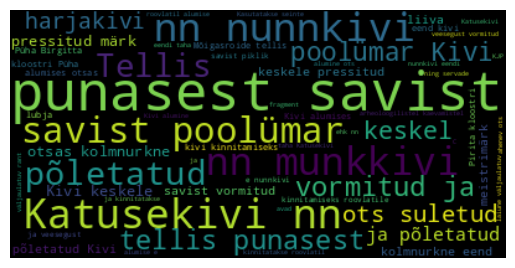

In [26]:
#generating world cloud

import matplotlib.pyplot as plt
# lower max_font_size
wordcloud = WordCloud(max_font_size=80).generate(df_joined)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()